In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('data/titanic_train.csv')

# Numerical

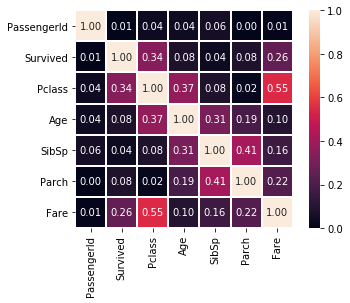

In [3]:
corr = df.corr().abs()

sns.heatmap(corr, 
            xticklabels=corr.columns, 
            yticklabels=corr.columns, 
            square=True, 
            linewidths=1, # space between cells
            annot=True, 
            fmt=".2f") # number of floating point digits

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Categorical

In [ ]:
# git clone https://github.com/shakedzy/dython.git
# pip install ./dython

In [17]:
from dython import nominal

In [18]:
nominal.cramers_v(df['Embarked'].values, df['Sex'].values)

0.11307233125458868

In [20]:
nominal.cramers_v(df['Sex'].values, df['Embarked'].values)

0.11307233125458868

cramers_v is symmetric

In [19]:
nominal.theils_u(df['Embarked'].values, df['Sex'].values)

0.012508611232640836

In [21]:
nominal.theils_u(df['Sex'].values, df['Embarked'].values)

0.014929471211224541

theils_u is not symmetric

In [140]:
from itertools import product
import numpy as np

In [151]:
df.dropna(inplace=True)

In [158]:
df = pd.DataFrame({'col_1' : ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
                   'col_2' : ['A', 'A', 'A', 'D', 'D', 'D', 'D'],
                   'col_3' : ['A', 'B', 'C', 'A', 'B', 'C', 'A'],})
df

,col_1,col_2,col_3
0,A,A,A
1,B,A,B
2,C,A,C
3,D,D,A
4,E,D,B
5,F,D,C
6,G,D,A


In [159]:
categorical_cols = list(df.select_dtypes(include=['object']).columns.values)
col_pairs = list(product(categorical_cols,repeat = 2))

In [160]:
col_pairs

[('col_1', 'col_1'),
 ('col_1', 'col_2'),
 ('col_1', 'col_3'),
 ('col_2', 'col_1'),
 ('col_2', 'col_2'),
 ('col_2', 'col_3'),
 ('col_3', 'col_1'),
 ('col_3', 'col_2'),
 ('col_3', 'col_3')]

In [165]:
corrs = []
for col_a, col_b in col_pairs:
    #corrs.append(nominal.theils_u(df[col_a].values,df[col_b].values))
    corrs.append(nominal.cramers_v(df[col_a].values,df[col_b].values))

C:\ProgramData\Anaconda3\lib\site-packages\dython\nominal.py:59: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
C:\ProgramData\Anaconda3\lib\site-packages\dython\nominal.py:59: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


In [166]:
corrs

[inf, nan, inf, nan, 0.6341004126582267, 0.0, inf, 0.0, 0.9999999999999998]

In [167]:
corrs = np.array(corrs).reshape(len(categorical_cols),-1)

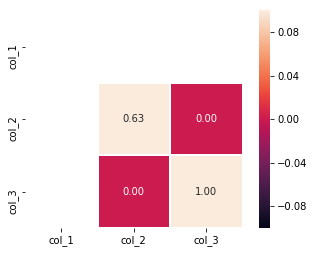

In [168]:
sns.heatmap(corrs, 
            xticklabels=categorical_cols, 
            yticklabels=categorical_cols, 
            square=True, 
            linewidths=1, # space between cells
            annot=True, 
            fmt=".2f") # number of floating point digits

In [156]:
corrs = np.array(corrs).reshape(len(categorical_cols),-1)

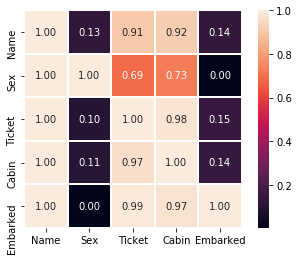

In [157]:
sns.heatmap(corrs, 
            xticklabels=categorical_cols, 
            yticklabels=categorical_cols, 
            square=True, 
            linewidths=1, # space between cells
            annot=True, 
            fmt=".2f") # number of floating point digits